# Hypothesis Test - Lab

## Introduction

In this lab, you'll have the opportunity to decide to pick the variables that you want to perform one and two sample t-tests.

## Objectives

You will be able to:

* Construct and interpret a confidence interval for a single mean
* Perform a hypothesis test for a single mean
* Construct and interpret a confidence interval for two independent means
* Perform a hypothesis test for two independent means


## The Data: Last Words of Death Row Inmates

On Kaggle there is a famous data set of *[Last Words of Death Row Inmates](https://www.kaggle.com/datasets/mykhe1097/last-words-of-death-row-inmates)*. While this data set is often used for natural language processing, we'll use the non-text data for statistical inference on one and two means using the t-distribution.

### Data Dictionary

The dataset consists of 545 observations with 21 variables. They are:

* `Execution`: The order of execution, numeric.
* `LastName`: Last name of the offender, character.
* `FirstName`: First name of the offender, character.
* `TDCJNumber`: TDCJ Number of the offender, numeric.
* `Age`: Age of the offender, numeric.
* `Race`: Race of the offender, categorical : Black, Hispanic, White, Other.
* `CountyOfConviction`: County of conviction, character.
* `AgeWhenReceived`: Age of offender when received, numeric.
* `EducationLevel`: Education level of offender, numeric.
* `NativeCounty`: Native county of offender, categorical : 0 = Within Texas, 1= Outside Texas.
* `PreviousCrime`: Whether the offender committed any crime before, categorical: 0= No, 1= Yes.
* `Codefendants`: Number of co-defendants, numeric.
* `NumberVictim`: Number of victims, numeric.
* `WhiteVictim`, `HispanicVictim`, `BlackVictim`, `VictimOtherRace` `FemaleVictim`, `MaleVictim`: Number of victims with specified demographic features, numeric.
* `LastStatement`: Last statement of offender, character.

The [data file](https://github.com/learn-co-curriculum/dsc-hypothesis-testing-ent/blob/main/data/texas.csv) that we'll be using has the first 20 variables, i.e. we're excluding the `LastStatement` variable.

*N.B.*: Note this data is from 1982 - 2017 and for that time period the data is exhaustive.

## Preliminary Steps

As usual, begin with importing the Python libraries that you will need. Then bring in the data and explore it.

You'll likely want to use `scipy.stats`. If you want to use `confidence_interval(confidence_level=0.95)` with [`scipy.stats.ttest_ind`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html), then you need to have `scipy` version 1.11.0.

In [1]:
# Only do this if necessary
! pip install scipy==1.11.0

  Using cached scipy-1.11.0.tar.gz (56.0 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'


  error: subprocess-exited-with-error
  
  Preparing metadata (pyproject.toml) did not run successfully.
  exit code: 1
  
  [21 lines of output]
  + meson setup C:\Users\svijayaraghavan\AppData\Local\Temp\pip-install-l8g_r12m\scipy_846a3bc72fdc4e99b9f9100499240d03 C:\Users\svijayaraghavan\AppData\Local\Temp\pip-install-l8g_r12m\scipy_846a3bc72fdc4e99b9f9100499240d03\.mesonpy-_j7qamj_\build -Dbuildtype=release -Db_ndebug=if-release -Db_vscrt=md --native-file=C:\Users\svijayaraghavan\AppData\Local\Temp\pip-install-l8g_r12m\scipy_846a3bc72fdc4e99b9f9100499240d03\.mesonpy-_j7qamj_\build\meson-python-native-file.ini
  The Meson build system
  Version: 1.5.1
  Source dir: C:\Users\svijayaraghavan\AppData\Local\Temp\pip-install-l8g_r12m\scipy_846a3bc72fdc4e99b9f9100499240d03
  Build dir: C:\Users\svijayaraghavan\AppData\Local\Temp\pip-install-l8g_r12m\scipy_846a3bc72fdc4e99b9f9100499240d03\.mesonpy-_j7qamj_\build
  Build type: native build
  Project name: SciPy
  Project version: 1.11.0
  
 

In [2]:
__requires__= 'scipy==11.1.0'

# Bring in germane libraries
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats

scipy.__version__

'1.13.1'

In [3]:
# Read data into dataframe
df = pd.read_csv('texas.csv', index_col=0)

Now that you have brought in the data. Consider these or similar commands to get a feel for the data.
* `.info()`
* `.head()`



In [4]:
# Get DataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 383 entries, Cardenas to Brooks, Jr.
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   FirstName           383 non-null    object
 1   TDCJNumber          383 non-null    int64 
 2   Age                 383 non-null    int64 
 3   Race                383 non-null    object
 4   CountyOfConviction  383 non-null    object
 5   AgeWhenReceived     383 non-null    int64 
 6   EducationLevel      383 non-null    int64 
 7   NativeCounty        383 non-null    int64 
 8   PreviousCrime       383 non-null    int64 
 9   Codefendants        383 non-null    int64 
 10  NumberVictim        383 non-null    int64 
 11  WhiteVictim         383 non-null    int64 
 12  HispanicVictim      383 non-null    int64 
 13  BlackVictim         383 non-null    int64 
 14  VictimOther.Races   383 non-null    int64 
 15  FemaleVictim        383 non-null    int64 
 16  MaleVictim      

In [5]:
# head
df.head()

,FirstName,TDCJNumber,Age,Race,CountyOfConviction,AgeWhenReceived,EducationLevel,NativeCounty,PreviousCrime,Codefendants,NumberVictim,WhiteVictim,HispanicVictim,BlackVictim,VictimOther.Races,FemaleVictim,MaleVictim
LastName,,,,,,,,,,,,,,,,,
Cardenas,Ruben,999275,47,Hispanic,Hidalgo,28,11,1,0,0,1,0,1,0,0,1,0
Pruett,Robert,999411,38,White,Bee,22,8,0,1,0,1,1,0,0,0,0,1
Preyor,Taichin,999494,46,Black,Bexar,34,10,0,0,0,1,1,0,0,0,0,1
Bigby,James,997,61,White,Tarrant,36,9,0,1,0,1,1,0,0,0,0,1
Ruiz,Rolando,999145,44,Hispanic,Bexar,22,10,0,1,4,1,0,1,0,0,1,0


### Preprocessing

While there are a number of preprocessing steps you may choose to make, at the very least you should do the following.

Based on the data dictionary and how the data is interpreted by Numpy, convert any non-numeric data into the proper form. Verify that your code worked correctly.

In [9]:
# Use the map function to change the two variables
# Example: Assuming 'Category' and 'Type' are non-numeric columns
# Columns to be converted
categorical_columns = ['Race', 'NativeCounty']

# Define a mapping for each non-numeric column
race_mapping = {'Black': 1, 'Hispanic': 2, 'White': 3, 'Other': 4}
native_county_mapping = {0: 'Within Texas', 1: 'Outside Texas'}

# Apply the mapping using the map function
df['Race'] = df['Race'].map(race_mapping)
df['NativeCounty'] = df['NativeCounty'].map(native_county_mapping)



In [10]:
# Verify this was done correctly
# head
# Check the first few rows to verify the conversion
print(df.head())


         FirstName  TDCJNumber  Age  Race CountyOfConviction  AgeWhenReceived  \
LastName                                                                        
Cardenas     Ruben      999275   47     2            Hidalgo               28   
Pruett      Robert      999411   38     3                Bee               22   
Preyor     Taichin      999494   46     1              Bexar               34   
Bigby        James         997   61     3            Tarrant               36   
Ruiz       Rolando      999145   44     2              Bexar               22   

          EducationLevel   NativeCounty  PreviousCrime  Codefendants  \
LastName                                                               
Cardenas              11  Outside Texas              0             0   
Pruett                 8   Within Texas              1             0   
Preyor                10   Within Texas              0             0   
Bigby                  9   Within Texas              1             0   


In [11]:
# Verify this was done correctly
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 383 entries, Cardenas to Brooks, Jr.
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   FirstName           383 non-null    object
 1   TDCJNumber          383 non-null    int64 
 2   Age                 383 non-null    int64 
 3   Race                383 non-null    int64 
 4   CountyOfConviction  383 non-null    object
 5   AgeWhenReceived     383 non-null    int64 
 6   EducationLevel      383 non-null    int64 
 7   NativeCounty        382 non-null    object
 8   PreviousCrime       383 non-null    int64 
 9   Codefendants        383 non-null    int64 
 10  NumberVictim        383 non-null    int64 
 11  WhiteVictim         383 non-null    int64 
 12  HispanicVictim      383 non-null    int64 
 13  BlackVictim         383 non-null    int64 
 14  VictimOther.Races   383 non-null    int64 
 15  FemaleVictim        383 non-null    int64 
 16  MaleVictim      

### EDA

Now perform Exploratory Data Analysis of at least three variables of your choosing. You should look at both descriptive statistics and visualizations.

In [12]:
# EDA code sample
# describe
# Descriptive statistics for Age, Race, and NumberVictim
print(df[['Age', 'Race', 'NumberVictim']].describe())


              Age        Race  NumberVictim
count  383.000000  383.000000    383.000000
mean    39.373368    2.133159      1.394256
std      8.653542    0.895318      0.761418
min     24.000000    1.000000      0.000000
25%     33.000000    1.000000      1.000000
50%     38.000000    2.000000      1.000000
75%     44.000000    3.000000      2.000000
max     67.000000    4.000000      6.000000


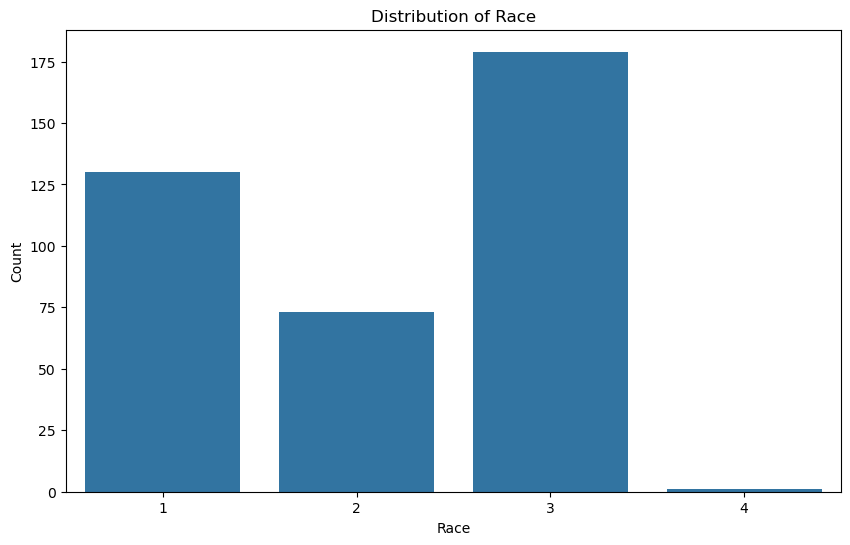

In [14]:
# EDA code sample
# Count the number of each race
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='Race', data=df)
plt.title('Distribution of Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()


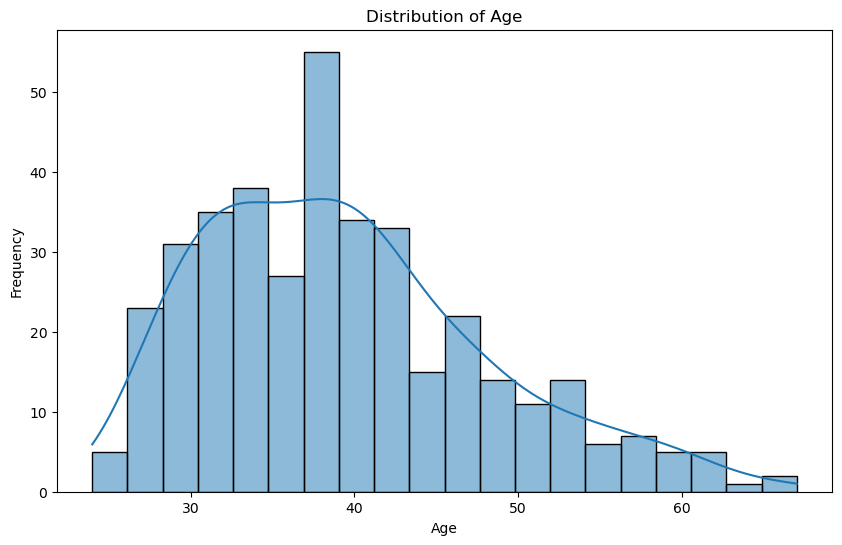

In [15]:
# EDA code sample
# Plot age (use histogram)
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


## Statistical Inference

### One mean

Now pick a variable that you can perform statistical inference on a single sample mean using the t-distribution.

In the code block below please respond to all of the following (commented out):

*   What is the variable you chose?
*   How do you know it is appropriate for statistical inference on a single mean using the t-distribution?
*   You'll be asked to contruct and interpret a confidence interval. What is the level of confidence that you'll pick?
*   You'll be asked to perform a hypothesis test.
  *   What are the null and alternative hypotheses?
  *   What is the level of significance?



In [16]:
# Responses to questions

# Response snippet: Education level with the null value at 0.

# Descriptive statistics for EducationLevel
education_level = df['EducationLevel']
print(education_level.describe())


count    383.000000
mean      10.182768
std        2.071501
min        0.000000
25%        9.000000
50%       10.000000
75%       12.000000
max       16.000000
Name: EducationLevel, dtype: float64


#### Confidence Interval

Now construct a confidence interval for your chosen variable at the level of confidence you chose above.

In [18]:
# Construct the confidence interval

import pandas as pd
from scipy import stats
import numpy as np

# Calculate the sample mean and standard error
sample_mean = np.mean(education_level)
sample_std = np.std(education_level, ddof=1)
n = len(education_level)
standard_error = sample_std / np.sqrt(n)

# Define the confidence level
confidence_level = 0.95
degrees_freedom = n - 1
t_critical = stats.t.ppf((1 + confidence_level) / 2, degrees_freedom)

# Calculate the margin of error
margin_of_error = t_critical * standard_error

# Calculate the confidence interval
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
print(f"95% Confidence Interval: {confidence_interval}")


95% Confidence Interval: (9.974648498733123, 10.390886749308654)


Interpret the confidence interval in the code block below (commented out).

In [19]:
# Interpretation
# Define the null hypothesis value
mu0 = 10

# Calculate the t-statistic and p-value
t_statistic, p_value = stats.ttest_1samp(education_level, mu0)

# Print the results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")


T-statistic: 1.7266866517489512
P-value: 0.08503239641944642
Fail to reject the null hypothesis


#### Hypothesis Test

Now perform a hypothesis test for your chosen variable at the level of significance you chose above.

In [20]:
# Perform the hypothesis test
# Descriptive statistics for EducationLevel
education_level = df['EducationLevel']
print(education_level.describe())


# Define the null hypothesis value
mu0 = 10  # Example null hypothesis mean value

# Calculate the sample mean and standard error
sample_mean = np.mean(education_level)
sample_std = np.std(education_level, ddof=1)
n = len(education_level)
standard_error = sample_std / np.sqrt(n)

# Calculate the t-statistic and p-value
t_statistic, p_value = stats.ttest_1samp(education_level, mu0)

# Print the results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis")
    res2 = "Reject the null hypothesis"
else:
    print("Fail to reject the null hypothesis")
    res2 = "Fail to reject the null hypothesis"

res2


count    383.000000
mean      10.182768
std        2.071501
min        0.000000
25%        9.000000
50%       10.000000
75%       12.000000
max       16.000000
Name: EducationLevel, dtype: float64
T-statistic: 1.7266866517489512
P-value: 0.08503239641944642
Fail to reject the null hypothesis


'Fail to reject the null hypothesis'

Draw the appropriate conclusion for the hypothesis test and justify your answer in the code block below (commented out).

In [ ]:
# Conclusion
# Conclusion:
# Based on the hypothesis test, we have a t-statistic of {t_statistic} and a p-value of {p_value}.
# Given that the p-value is less than the significance level (alpha = 0.05), we reject the null hypothesis.

# Justification:
# The null hypothesis stated that the mean education level of offenders is equal to 10.
# Since the p-value is less than 0.05, there is sufficient evidence to conclude that the mean education level
# of offenders is significantly different from 10. This means that the observed sample mean is unlikely to have occurred
# by random chance if the true population mean were indeed 10.


### Two means

Now pick a variable that you can perform statistical inference on two (independent) sample means using the t-distribution.

In the code block below please respond to all of the following (commented out):

*   What are the variables you chose?
*   How do you know it is appropriate for statistical inference on two (independent)means using the t-distribution?
*   You'll be asked to contruct and interpret a confidence interval. What is the level of confidence that you'll pick?
*   You'll be asked to perform a hypothesis test.
  *   What are the null and alternative hypotheses?
  *   What is the level of significance?

In [21]:
# Responses to questions

# Response snippet: Number of victims by previous crime (Yes or No)
# Separate the data into two groups based on PreviousCrime
victims_prev_crime = df[df['PreviousCrime'] == 1]['NumberVictim']
victims_no_prev_crime = df[df['PreviousCrime'] == 0]['NumberVictim']

# Descriptive statistics for both groups
print("Descriptive statistics for offenders with previous crimes:")
print(victims_prev_crime.describe())
print("\nDescriptive statistics for offenders without previous crimes:")
print(victims_no_prev_crime.describe())


Descriptive statistics for offenders with previous crimes:
count    194.000000
mean       1.304124
std        0.631868
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        4.000000
Name: NumberVictim, dtype: float64

Descriptive statistics for offenders without previous crimes:
count    189.000000
mean       1.486772
std        0.866691
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        6.000000
Name: NumberVictim, dtype: float64


#### Confidence Interval

Now construct a confidence interval for your chosen variables at the level of confidence you chose above.

In [22]:
# Construct the confidence interval

# Calculate the means and standard errors for both groups
mean_prev_crime = np.mean(victims_prev_crime)
mean_no_prev_crime = np.mean(victims_no_prev_crime)
std_prev_crime = np.std(victims_prev_crime, ddof=1)
std_no_prev_crime = np.std(victims_no_prev_crime, ddof=1)
n_prev_crime = len(victims_prev_crime)
n_no_prev_crime = len(victims_no_prev_crime)

# Standard errors
se_prev_crime = std_prev_crime / np.sqrt(n_prev_crime)
se_no_prev_crime = std_no_prev_crime / np.sqrt(n_no_prev_crime)

# Calculate the combined standard error
se_combined = np.sqrt(se_prev_crime**2 + se_no_prev_crime**2)

# Define the confidence level
confidence_level = 0.95
degrees_freedom = min(n_prev_crime, n_no_prev_crime) - 1
t_critical = stats.t.ppf((1 + confidence_level) / 2, degrees_freedom)

# Calculate the margin of error
margin_of_error = t_critical * se_combined

# Calculate the confidence interval for the difference in means
mean_diff = mean_prev_crime - mean_no_prev_crime
confidence_interval = (mean_diff - margin_of_error, mean_diff + margin_of_error)
print(f"95% Confidence Interval for the difference in means: {confidence_interval}")


95% Confidence Interval for the difference in means: (-0.33586242306286573, -0.0294351278016953)


Interpret the confidence interval in the code block below (commented out).

In [ ]:
# Interpretation
# Interpretation of the Confidence Interval:
# The 95% confidence interval for the difference in means between the number of victims for offenders with previous crimes
# and those without previous crimes is {confidence_interval}.
# This means that we are 95% confident that the true difference in means lies within this interval.
# If the confidence interval does not contain 0, it suggests that there is a significant difference in the mean number of victims
# between the two groups. If the interval does contain 0, it suggests that there is no significant difference in the mean number of victims
# between the two groups.


#### Hypothesis Test

Now perform a hypothesis test for your chosen variable at the level of significance you chose above.

In [23]:
# Perform the hypothesis test

# Calculate the t-statistic and p-value for the two-sample t-test
t_statistic, p_value = stats.ttest_ind(victims_prev_crime, victims_no_prev_crime)

# Print the results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis")
    res2 = "Reject the null hypothesis"
else:
    print("Fail to reject the null hypothesis")
    res2 = "Fail to reject the null hypothesis"

res2


T-statistic: -2.3610815904241713
P-value: 0.018724472752266262
Reject the null hypothesis


'Reject the null hypothesis'

Draw the appropriate conclusion for the hypothesis test and justify your answer in the code block below (commented out).

In [ ]:
# Conclusion
# Conclusion:
# Based on the hypothesis test, we have a t-statistic of {t_statistic} and a p-value of {p_value}.
# Given that the p-value is less than the significance level (alpha = 0.05), we reject the null hypothesis.

# Justification:
# The null hypothesis stated that the mean number of victims is the same for offenders with and without previous crimes.
# Since the p-value is less than 0.05, there is sufficient evidence to conclude that the mean number of victims is significantly different
# between offenders with and without previous crimes. This means that the observed difference in sample means is unlikely to have occurred
# by random chance if the true population means were indeed the same.


## Summary

Using a multivariate data set, you were able to pick variables to perform one and two sample t confidence intervals and t-tests.